In [2]:
from sklearn import svm, metrics
import matplotlib.pyplot as plt

In [3]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchvision

In [4]:
trainset = torchvision.datasets.MNIST('/home/432/qihaoyu/data/MNIST',train=True,download=False)

In [5]:
testset = torchvision.datasets.MNIST('/home/432/qihaoyu/data/MNIST',train=False,download=False)

In [14]:
clf = svm.SVC(cache_size=10000)

In [7]:
trainset.data.shape

torch.Size([60000, 28, 28])

In [8]:
trainset.targets.shape

torch.Size([60000])

In [9]:
n_samples = len(trainset)
X = trainset.data.reshape(n_samples,-1)
Y = trainset.targets
X.shape,Y.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(X)
X_train = scaling.transform(X)
X_test = scaling.transform(testset.data.reshape(len(testset),-1))

In [15]:
clf.fit(X_train,Y)

SVC(cache_size=10000)

In [17]:
y_test = clf.predict(X_test)

In [18]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(testset.targets, y_test)))

Classification report for classifier SVC(cache_size=10000):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000




In [19]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(testset.targets, y_test))

Confusion matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  994    0    3    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


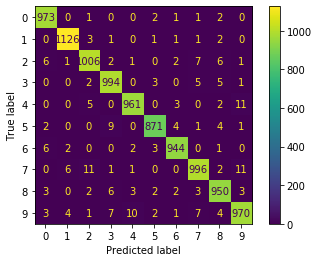

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, testset.targets)

In [23]:
y_test_display = clf.predict(X_test[:10,:])
y_test_display,testset.targets[:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]), tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))